<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Classificadores_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==0.22

     |████████████████████████████████| 7.0MB 3.7MB/s 
  Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [ ]:
pip install xgboost

In [ ]:
pip install six

In [2]:
pip install catboost

     |████████████████████████████████| 65.7MB 53kB/s 


In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.pipeline import make_pipeline,Pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold


In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [4]:
integrada11_padronizada = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/integrada11_padronizada.csv",sep = ',',encoding = 'utf8')
integrada11_smote = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/integrada11_smote.csv",sep = ',',encoding = 'utf8')
integrada11_scobre = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/integrada11_padronizada_scobre.csv",sep = ',',encoding = 'utf8')

In [5]:
df1=integrada11_scobre[['SODIO','VISCOSIDADE','AGUA','FULIGEM','TBN','OXIDACAO','FERRO','Target']]
df1.head()


,SODIO,VISCOSIDADE,AGUA,FULIGEM,TBN,OXIDACAO,FERRO,Target
0,-0.694144,-0.007287,-1.175735,-1.557609,1.441191,0.160536,-0.928089,Normal
1,-0.632109,0.489209,-1.175735,-0.439648,1.247042,0.565434,-0.459884,Normal
2,0.877927,1.741674,-1.175735,-0.125971,0.122924,2.078318,-0.669897,Normal
3,1.567717,0.270066,-1.175735,-1.156947,3.072901,0.436043,-0.875172,Normal
4,-0.113862,1.151374,-1.175735,0.848648,-0.131624,1.642435,-0.649937,Normal


In [6]:
df1['Target'].count()

40269

In [7]:
df1.groupby('Target').count()

,SODIO,VISCOSIDADE,AGUA,FULIGEM,TBN,OXIDACAO,FERRO
Target,,,,,,,
Chumbo,46,46,46,46,46,46,46
Ferro,24,24,24,24,24,24,24
Fuligem,897,897,897,897,897,897,897
Normal,26136,26136,26136,26136,26136,26136,26136
Ocorrência,100,100,100,100,100,100,100
Ponto de Fulgor,364,364,364,364,364,364,364
Silício,1123,1123,1123,1123,1123,1123,1123
Sódio,3163,3163,3163,3163,3163,3163,3163
TBN,4577,4577,4577,4577,4577,4577,4577


In [8]:
#colunas = ['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','NIQUEL','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE','AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO']
#colunas = ['PRATA','DIESEL','SODIO','ESTANHO','NIQUEL','AGUA','Target']
#cols = ['Target']

array = df1.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:7]
Y = array[:,7]
y = LabelEncoder().fit_transform(Y)
#y1 = LabelEncoder().fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [9]:
X_train.shape

(30201, 7)

In [10]:
y_train.shape

(30201,)

In [ ]:
random_seed = 4734

models = [
          ('BBC', BalancedBaggingClassifier(n_estimators = 500, bootstrap_features= True, n_jobs = -1, random_state = random_seed)),
          ('XGBM', XGBClassifier(random_state = random_seed, class_weight = "balanced", n_jobs = -1)),
          ('RFC', RandomForestClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced")),
          ('LGBM', LGBMClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced")),
          ('CATB', CatBoostClassifier(thread_count = -1, random_state = random_seed))
         ]



models = [
          ('ETC',ExtraTreesClassifier(n_estimators=10, min_samples_split=2)),
          ('RFC', RandomForestClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced"))
          ]    



dfs = []
results = []
names = []
probas_list = []
best_clf = []
scoring = ['balanced_accuracy', 'neg_log_loss', 'precision', 'recall','f1_macro']#,'roc_auc']


In [ ]:
for name, model in models:
  print(name)
  kfold = StratifiedKFold(n_splits = 2, shuffle = True, random_state = random_seed)
  imba_pipeline = make_pipeline(SVMSMOTE('auto', random_state = random_seed), model)
  cv_results = cross_validate(imba_pipeline, X_train, y_train, cv = KFold, scoring = scoring)
  clf = imba_pipeline.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_proba = clf.predict_proba(X_test)
  probas_list.append(y_proba)
  print(classification_report(y_test, y_pred))
  best_clf.append((name, clf))
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)


ETC


AttributeError: ignored

In [ ]:
n_splits

NameError: ignored

In [ ]:
final = pd.concat(dfs, ignore_index = True)
skplt.metrics.plot_calibration_curve(y_all_test, probas_list, pd.DataFrame(models).iloc[:,0], figsize = (10, 7.5))


In [ ]:
names = ["Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]
  


    #classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(kernel="poly", degree=3, C=0.025),
    #SVC(kernel="rbf", C=1, gamma=2),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    #DecisionTreeClassifier(max_depth=5),
    #ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    #RandomForestClassifier(max_depth=5, n_estimators=100),
    #MLPClassifier(alpha=1, max_iter=1000),
    #AdaBoostClassifier(n_estimators=100),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
    #SGDClassifier(loss="hinge", penalty="l2")]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_smt, y_train_smt)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [ ]:
df = pd.DataFrame()
df['Classificador'] = names
df['Score'] = scores
df

,Classificador,Score
0,Nearest_Neighbors,0.014601
1,Decision_Tree,0.138657
2,Extra_Trees,0.009833
3,Random_Forest,0.058006
4,Neural_Net,0.049662
5,AdaBoost,0.082241
6,QDA,0.082340


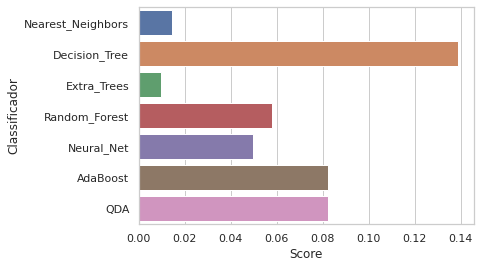

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classificador", x="Score", data=df)

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

n_splits = 2
n_measures = 2 #Recall and AUC
kf = StratifiedKFold(n_splits=n_splits) #Stratified because we need balanced samples
kf.get_n_splits(X)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=1)
s =(n_splits,n_measures)
scores = np.zeros(s)
for train_index, test_index in kf.split(X,y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   sm = SMOTE(ratio = 'auto',k_neighbors = 5, n_jobs = -1)
   smote_enn = SMOTEENN(smote = sm)
   x_train_res, y_train_res = smote_enn.fit_sample(X_train, y_train)
   clf_rf.fit(x_train_res, y_train_res)
   y_pred = clf_rf.predict(X_test)
   scores[test_index] = recall_score(y_test, y_pred,average="macro")
   #scores[test_index,2] = auc(y_test, y_pred)

TRAIN: [15342 15343 15345 ... 40266 40267 40268] TEST: [    0     1     2 ... 33001 33140 33226]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

IndexError: ignored

In [20]:
random_seed = 4545
from imblearn.combine import SMOTEENN

sm = SMOTE(ratio = 'auto',k_neighbors = 5, n_jobs = -1)
#smote_enn = SMOTEENN(smote = sm)
#x_train_res, y_train_res = smote_enn.fit_sample(X_train, y_train)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
names = ["RFC","ETC","DTC","ABC","NeuralNet"]


classifiers = [
          RandomForestClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced") ,    
          ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
          DecisionTreeClassifier(max_depth=5),
          AdaBoostClassifier(n_estimators=100),
          MLPClassifier(alpha=1, max_iter=1500)]
          #]    


scores = []
for name, clf in zip(names, classifiers):
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)##
    #scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)##
    clf.fit(x_train_res, y_train_res)
    score = clf.score(X_test, y_test)
    scores.append(score)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [21]:
df = pd.DataFrame()
df['Classificador'] = names
df['Score'] = scores
df

,Classificador,Score
0,RFC,0.638955
1,ETC,0.609257
2,DTC,0.278705
3,ABC,0.121673
4,NeuralNet,0.334525


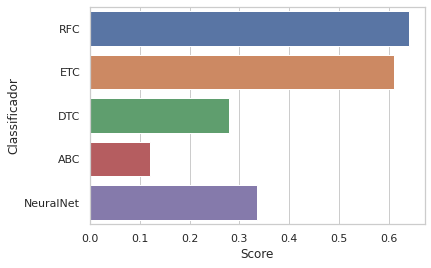

In [22]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classificador", x="Score", data=df)

In [ ]:
 score = clf_rf.score(X_test, y_test)
 score

0.6143531164638689

In [13]:
random_seed = 4545
steps = [('over', SMOTE()), ('model', RandomForestClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced"))]
pipeline = Pipeline(steps=steps)

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# evaluate pipeline
for scoring in["accuracy", "weighted"]:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

KeyboardInterrupt: ignored

In [24]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = RandomForestClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced")
# evaluate model
scores = cross_val_score(model, x_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.958 (0.001)


In [31]:
random_seed = 4545
from imblearn.combine import SMOTEENN

sm = SMOTE(ratio = 'auto',k_neighbors = 5, n_jobs = -1)
#smote_enn = SMOTEENN(smote = sm)
#x_train_res, y_train_res = smote_enn.fit_sample(X_train, y_train)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
names = ["RFC","ETC","DTC","ABC","NeuralNet"]

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


classifiers = [
          RandomForestClassifier(n_jobs = -1, random_state = random_seed, class_weight = "balanced") ,    
          ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
          DecisionTreeClassifier(max_depth=5),
          AdaBoostClassifier(n_estimators=100),
          MLPClassifier(alpha=1, max_iter=1500)]
          #]    


scores = []
for name, clf in zip(names, classifiers):
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)##
    #scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)##
    #clf.fit(x_train_res, y_train_res)
    #score = clf.score(X_test, y_test)
    score = cross_val_score(clf, x_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1)
    scores.append(score)

resultado= []
for x in range(len(scores)):
  resultado.append(mean(scores[x]))    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [45]:
df = pd.DataFrame()
df['Classificador'] = names
df['Score'] = resultado
df

,Classificador,Score
0,RFC,0.958538
1,ETC,0.951783
2,DTC,0.355531
3,ABC,0.306333
4,NeuralNet,0.557709


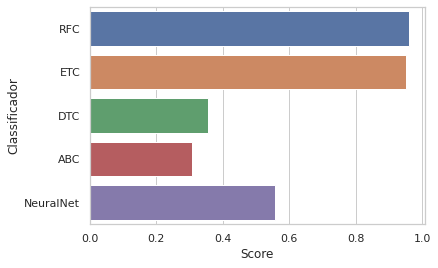

In [46]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classificador", x="Score", data=df)